  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.19.5 which is incompatible.
nibabel 5.2.1 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
ml-dtypes 0.0.4 requires numpy>1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.4.8 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.


In [1]:
import os 
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

In [6]:
pip uninstall tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Danishga\\.idlerc\\anacondas\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [2]:
print(tf.__version__) 
print(keras.__version__) 
print(np.__version__)

2.12.0
2.12.0
1.22.4


In [3]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [4]:
#train
train = data(r'C:\Users\Danishga\Downloads\archive (5)\dataset\train')
train.head()

image      label
0  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
1  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
2  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
3  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
4  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured

In [5]:
test=data(r'C:\Users\Danishga\Downloads\archive (5)\dataset\test')
test.head()

image      label
0  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
1  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
2  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
3  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
4  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured

In [6]:
#val
val=data(r'C:\Users\Danishga\Downloads\archive (5)\dataset\val') 
val.head()

image      label
0  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
1  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
2  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
3  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured
4  C:\Users\Danishga\Downloads\archive (5)\datase...  fractured

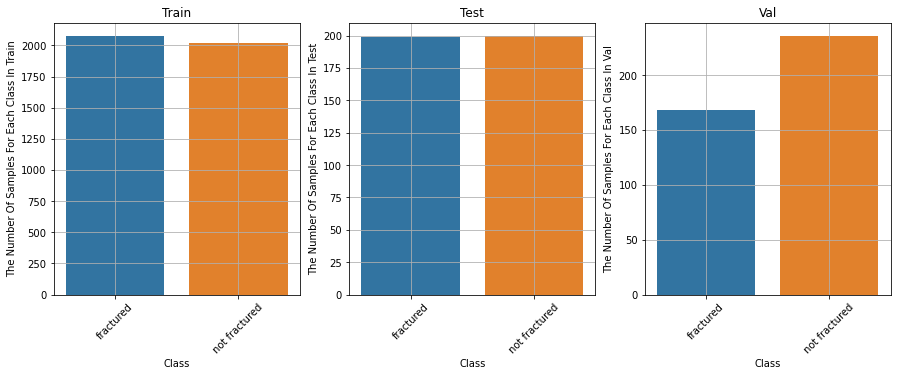

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.countplot(x=train.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Train")
plt.title('Train')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
ax = sns.countplot(x=test.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Test")
plt.title('Test')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
ax = sns.countplot(x=val.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Val")
plt.title('Val')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

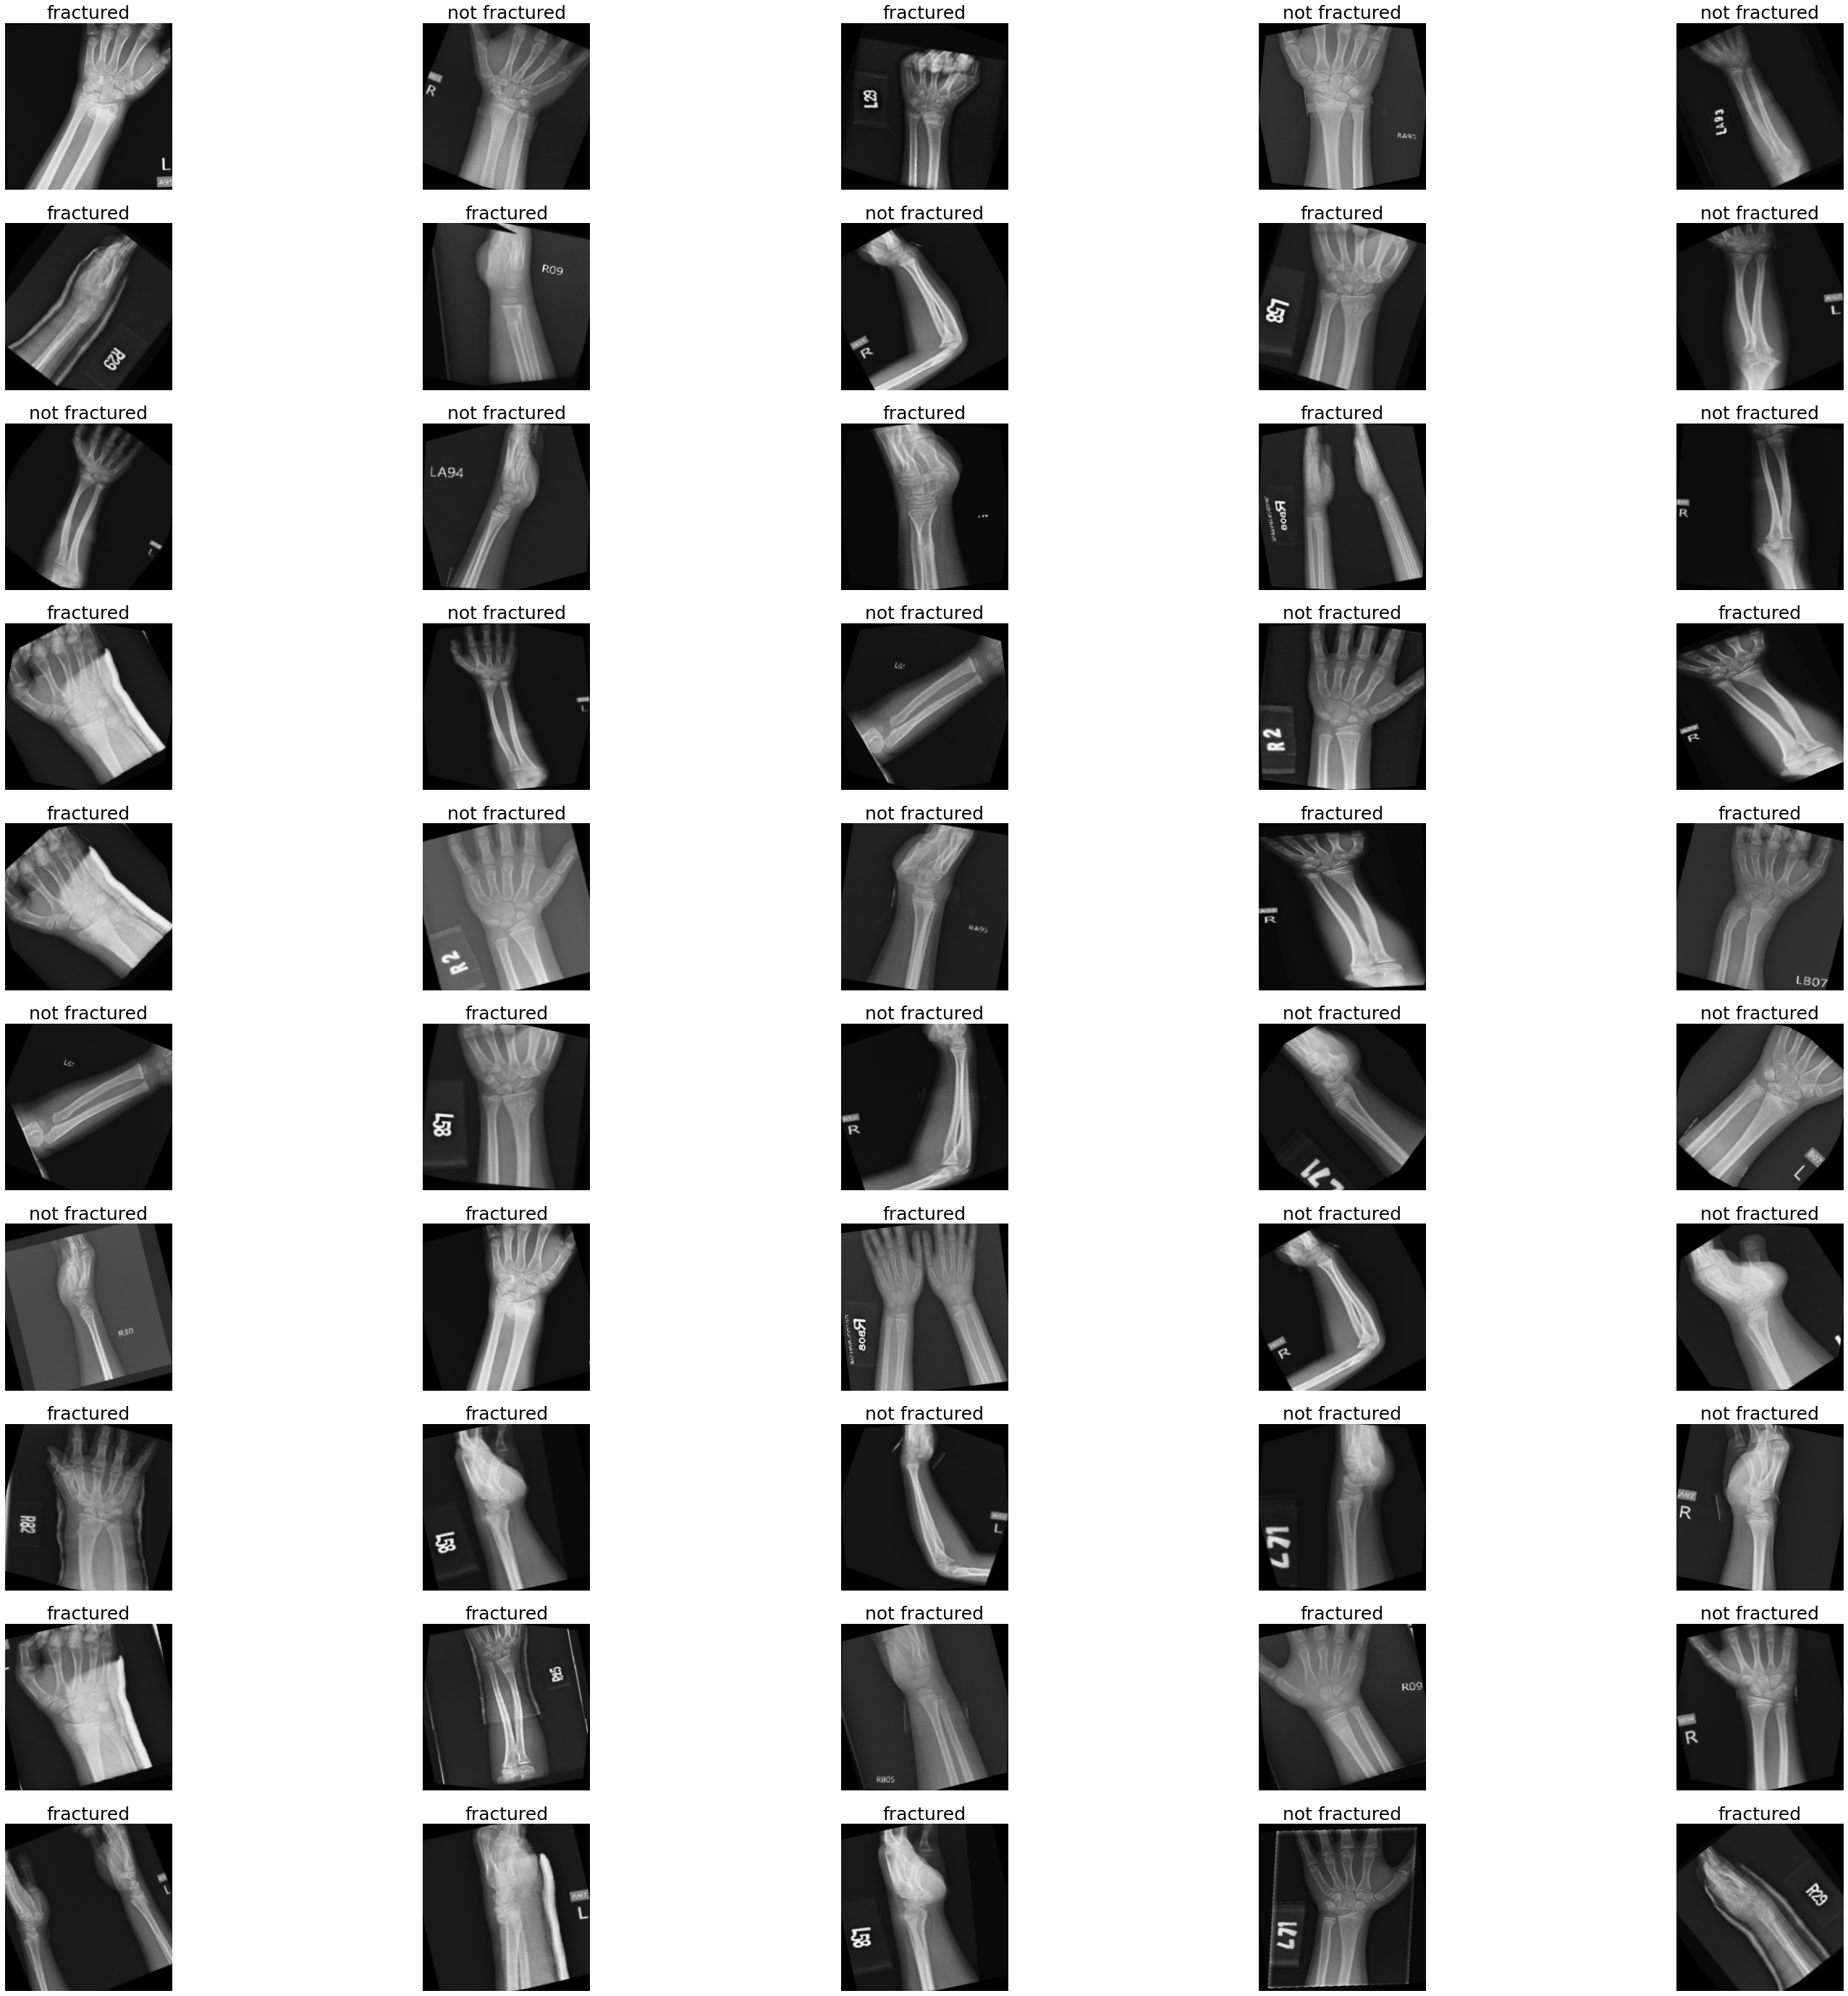

In [8]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train.label[i],fontsize=25)

In [9]:
image_size = (256, 256)
batch_size = 8
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 4097 validated image filenames belonging to 2 classes.
Found 399 validated image filenames belonging to 2 classes.
Found 404 validated image filenames belonging to 2 classes.


In [10]:
def inverted_residual_block(inputs, num_filters, strides=1, expansion_ratio=1):
    ## Point-Wise Convolution
    x = keras.layers.Conv2D(
        filters=expansion_ratio*inputs.shape[-1],
        kernel_size=1,
        padding="same",
        use_bias=False
    )(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)

    ## Depth-Wise Convolution
    x = keras.layers.DepthwiseConv2D(
        kernel_size=3,
        strides=strides,
        padding="same",
        use_bias=False
    )(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)

    ## Point-Wise Convolution
    x = keras.layers.Conv2D(
        filters=num_filters,
        kernel_size=1,
        padding="same",
        use_bias=False
    )(x)
    x = keras.layers.BatchNormalization()(x)

    ## Residual Connection
    if strides == 1 and (inputs.shape == x.shape):
        return keras.layers.Add()([inputs, x])
    return x

In [11]:
def mlp(x, mlp_dim, dim, dropout_rate=0.1):
    x = keras.layers.Dense(mlp_dim, activation="swish")(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Dense(dim)(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    return x

In [12]:
def transformer_encoder(x, num_heads, dim, mlp_dim):
    skip_1 = x
    x = keras.layers.LayerNormalization()(x)
    x = keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=dim
    )(x, x)
    x = keras.layers.Add()([x, skip_1])

    skip_2 = x
    x = keras.layers.LayerNormalization()(x)
    x = mlp(x, mlp_dim, dim)
    x = keras.layers.Add()([x, skip_2])

    return x

In [13]:
def mobile_vit_block(inputs, num_filters, dim, patch_size=2, num_layers=1):
    B, H, W, C = inputs.shape

    ## 3x3 conv
    x = keras.layers.Conv2D(
        filters=C,
        kernel_size=3,
        padding="same",
        use_bias=False
    )(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)

    ## 1x1 conv: d-dimension
    x = keras.layers.Conv2D(
        filters=dim,
        kernel_size=1,
        padding="same",
        use_bias=False
    )(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)
    ## Reshape x to flattened patches
    P = patch_size*patch_size
    N = int(H*W//P)
    x = keras.layers.Reshape((P, N, dim))(x)

    ## Transformr Encoder
    for _ in range(num_layers):
        x = transformer_encoder(x, 1, dim, dim*2)

    ## Reshape
    x = keras.layers.Reshape((H, W, dim))(x)

    ## 1x1 conv: C-dimension
    x = keras.layers.Conv2D(
        filters=C,
        kernel_size=1,
        padding="same",
        use_bias=False
    )(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)
    ## Concatenation
    x = keras.layers.Concatenate()([x, inputs])

    ## 3x3 conv
    x = keras.layers.Conv2D(
        filters=num_filters,
        kernel_size=3,
        padding="same",
        use_bias=False
    )(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)

    return x

In [14]:
def MobileViT(input_shape, num_channels, dim, expansion_ratio, num_layers=[2, 4, 3], num_classes=1000):
    ## Input layer
    inputs = keras.layers.Input(input_shape)

    ## Stem
    x = keras.layers.Conv2D(
        filters=num_channels[0],
        kernel_size=3,
        strides=2,
        padding="same",
        use_bias=False
    )(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)
    x = inverted_residual_block(x, num_channels[1], strides=1, expansion_ratio=expansion_ratio)
    ## Stage 1
    x = inverted_residual_block(x, num_channels[2], strides=2, expansion_ratio=expansion_ratio)
    x = inverted_residual_block(x, num_channels[3], strides=1, expansion_ratio=expansion_ratio)
    x = inverted_residual_block(x, num_channels[4], strides=1, expansion_ratio=expansion_ratio)

    ## Stage 2
    x = inverted_residual_block(x, num_channels[5], strides=2, expansion_ratio=expansion_ratio)
    x = mobile_vit_block(x, num_channels[6], dim[0], num_layers=num_layers[0])

    ## Stage 3
    x = inverted_residual_block(x, num_channels[7], strides=2, expansion_ratio=expansion_ratio)
    x = mobile_vit_block(x, num_channels[8], dim[1], num_layers=num_layers[1])

    ## Stage 4
    x = inverted_residual_block(x, num_channels[9], strides=2, expansion_ratio=expansion_ratio)
    x = mobile_vit_block(x, num_channels[10], dim[2], num_layers=num_layers[2])
    x = keras.layers.Conv2D(
        filters=num_channels[11],
        kernel_size=1,
        padding="same",
        use_bias=False
    )(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("swish")(x)

    ## Classifier
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(512,activation='relu')(x)
    x = keras.layers.Dropout(.3)(x)
    x= keras.layers.Dense(256,activation='relu')(x)
    x= keras.layers.Dropout(.3)(x)
    outputs = keras.layers.Dense(num_classes, activation="sigmoid")(x)

    model = tf.keras.models.Model(inputs, outputs)
    return model

In [15]:
def MobileViT_S(input_shape, num_classes):
    num_channels = [16, 32, 64, 64, 64, 96, 144, 128, 192, 160, 240, 640]
    dim = [144, 192, 240]
    expansion_ratio = 4

    return MobileViT(
        input_shape,
        num_channels,
        dim,
        expansion_ratio,
        num_classes=num_classes
    )

In [16]:
def MobileViT_XS(input_shape, num_classes):
    num_channels = [16, 32, 48, 48, 48, 64, 96, 80, 120, 96, 144, 384]
    dim = [96, 120, 144]
    expansion_ratio = 4

    return MobileViT(
        input_shape,
        num_channels,
        dim,
        expansion_ratio,
        num_classes=num_classes
    )

In [17]:
def MobileViT_XXS(input_shape, num_classes):
    num_channels = [16, 16, 24, 24, 24, 48, 64, 64, 80, 80, 96, 320]
    dim = [64, 80, 96]
    expansion_ratio = 2

    return MobileViT(
        input_shape,
        num_channels,
        dim,
        expansion_ratio,
        num_classes=num_classes
    )

In [18]:
model = MobileViT_S((256, 256, 3), 1)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

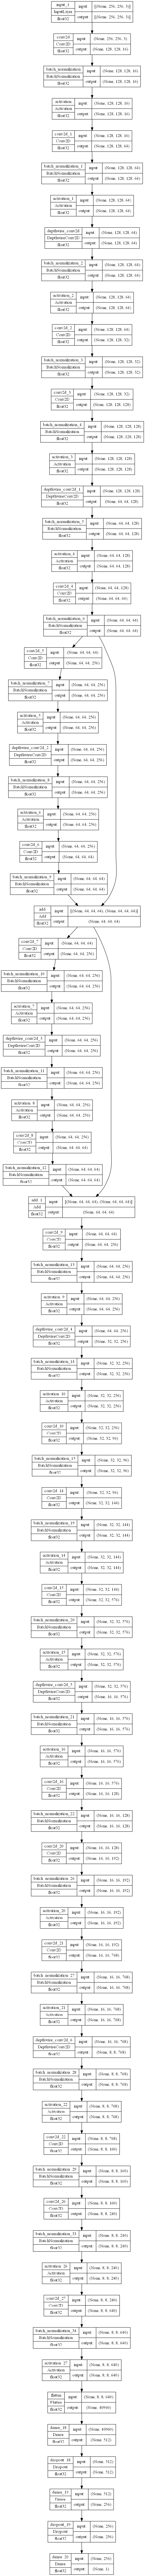

In [20]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [21]:
checkpoint_cb =ModelCheckpoint("my_keras_model1.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist=model.fit(train_generator,epochs=10,validation_data=val_generator,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/10
513/513 [==============================] - 1688s 3s/step - loss: 0.7643 - accuracy: 0.7425 - specificity_at_sensitivity: 0.8792 - auc: 0.7985 - val_loss: 0.6441 - val_accuracy: 0.6361 - val_specificity_at_sensitivity: 0.8452 - val_auc: 0.7305
Epoch 2/10
513/513 [==============================] - 973s 2s/step - loss: 0.3648 - accuracy: 0.8606 - specificity_at_sensitivity: 0.9774 - auc: 0.9263 - val_loss: 0.1871 - val_accuracy: 0.9257 - val_specificity_at_sensitivity: 1.0000 - val_auc: 0.9881
Epoch 3/10
513/513 [==============================] - 920s 2s/step - loss: 0.2109 - accuracy: 0.9192 - specificity_at_sensitivity: 0.9952 - auc: 0.9747 - val_loss: 0.1970 - val_accuracy: 0.9134 - val_specificity_at_sensitivity: 1.0000 - val_auc: 0.9785
Epoch 4/10
513/513 [==============================] - 1078s 2s/step - loss: 0.1840 - accuracy: 0.9402 - specificity_at_sensitivity: 0.9971 - auc: 0.9801 - val_loss: 0.3605 - val_accuracy: 0.8787 - val_specificity_at_sensitivity: 1.0000 - va

In [22]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  specificity_at_sensitivity       auc  val_loss  \
0  0.764317  0.742495                    0.879211  0.798541  0.644125   
1  0.364788  0.860630                    0.977382  0.926337  0.187077   
2  0.210926  0.919209                    0.995188  0.974664  0.196988   
3  0.183978  0.940200                    0.997113  0.980129  0.360478   
4  0.159448  0.948987                    0.996631  0.984798  0.241330   
5  0.097971  0.966805                    0.998075  0.992884  0.179497   
6  0.126369  0.956309                    0.997594  0.989517  0.137955   
7  0.088816  0.971687                    0.997113  0.993782  0.077036   
8  0.084977  0.976080                    0.997594  0.994358  0.064001   
9  0.082133  0.970466                    0.999038  0.995551  0.057683   

   val_accuracy  val_specificity_at_sensitivity   val_auc  
0      0.636139                        0.845238  0.730466  
1      0.925743                        1.000000  0.988108  
2      0.913366                        1.000000  0.978511  
3      0.878713                        1.000000  0.972218  
4      0.925743                        0.988095  0.977590  
5      0.943069                        0.982143  0.981954  
6      0.957921                        1.000000  0.986922  
7      0.980198                        0.994048  0.994035  
8      0.972772                        1.000000  0.997970  
9      0.980198                        1.000000  0.997301

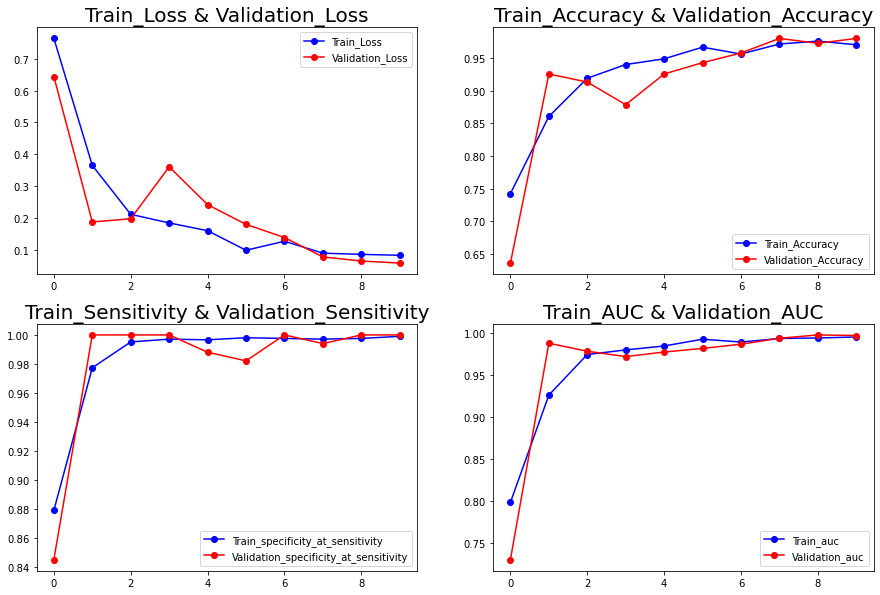

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_.iloc[:,0],'b-o',label='Train_Loss')
plt.plot(hist_.iloc[:,4],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_.iloc[:,1],'b-o',label='Train_Accuracy')
plt.plot(hist_.iloc[:,5],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_.iloc[:,2],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_.iloc[:,6],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_.iloc[:,3],'b-o',label='Train_auc')
plt.plot(hist_.iloc[:,-1],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [24]:
score, acc,sensitivity,auc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test Sensitivity =', sensitivity)
print('Test AUC =', auc)

50/50 [==============================] - 41s 816ms/step - loss: 0.0859 - accuracy: 0.9774 - specificity_at_sensitivity: 1.0000 - auc: 0.9939
Test Loss = 0.085922010242939
Test Accuracy = 0.9774436354637146
Test Sensitivity = 1.0
Test AUC = 0.9939070343971252


In [25]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

50/50 [==============================] - 44s 812ms/step


Actual  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
..      ...         ...
394       1           1
395       1           1
396       1           1
397       1           1
398       1           1

[399 rows x 2 columns]

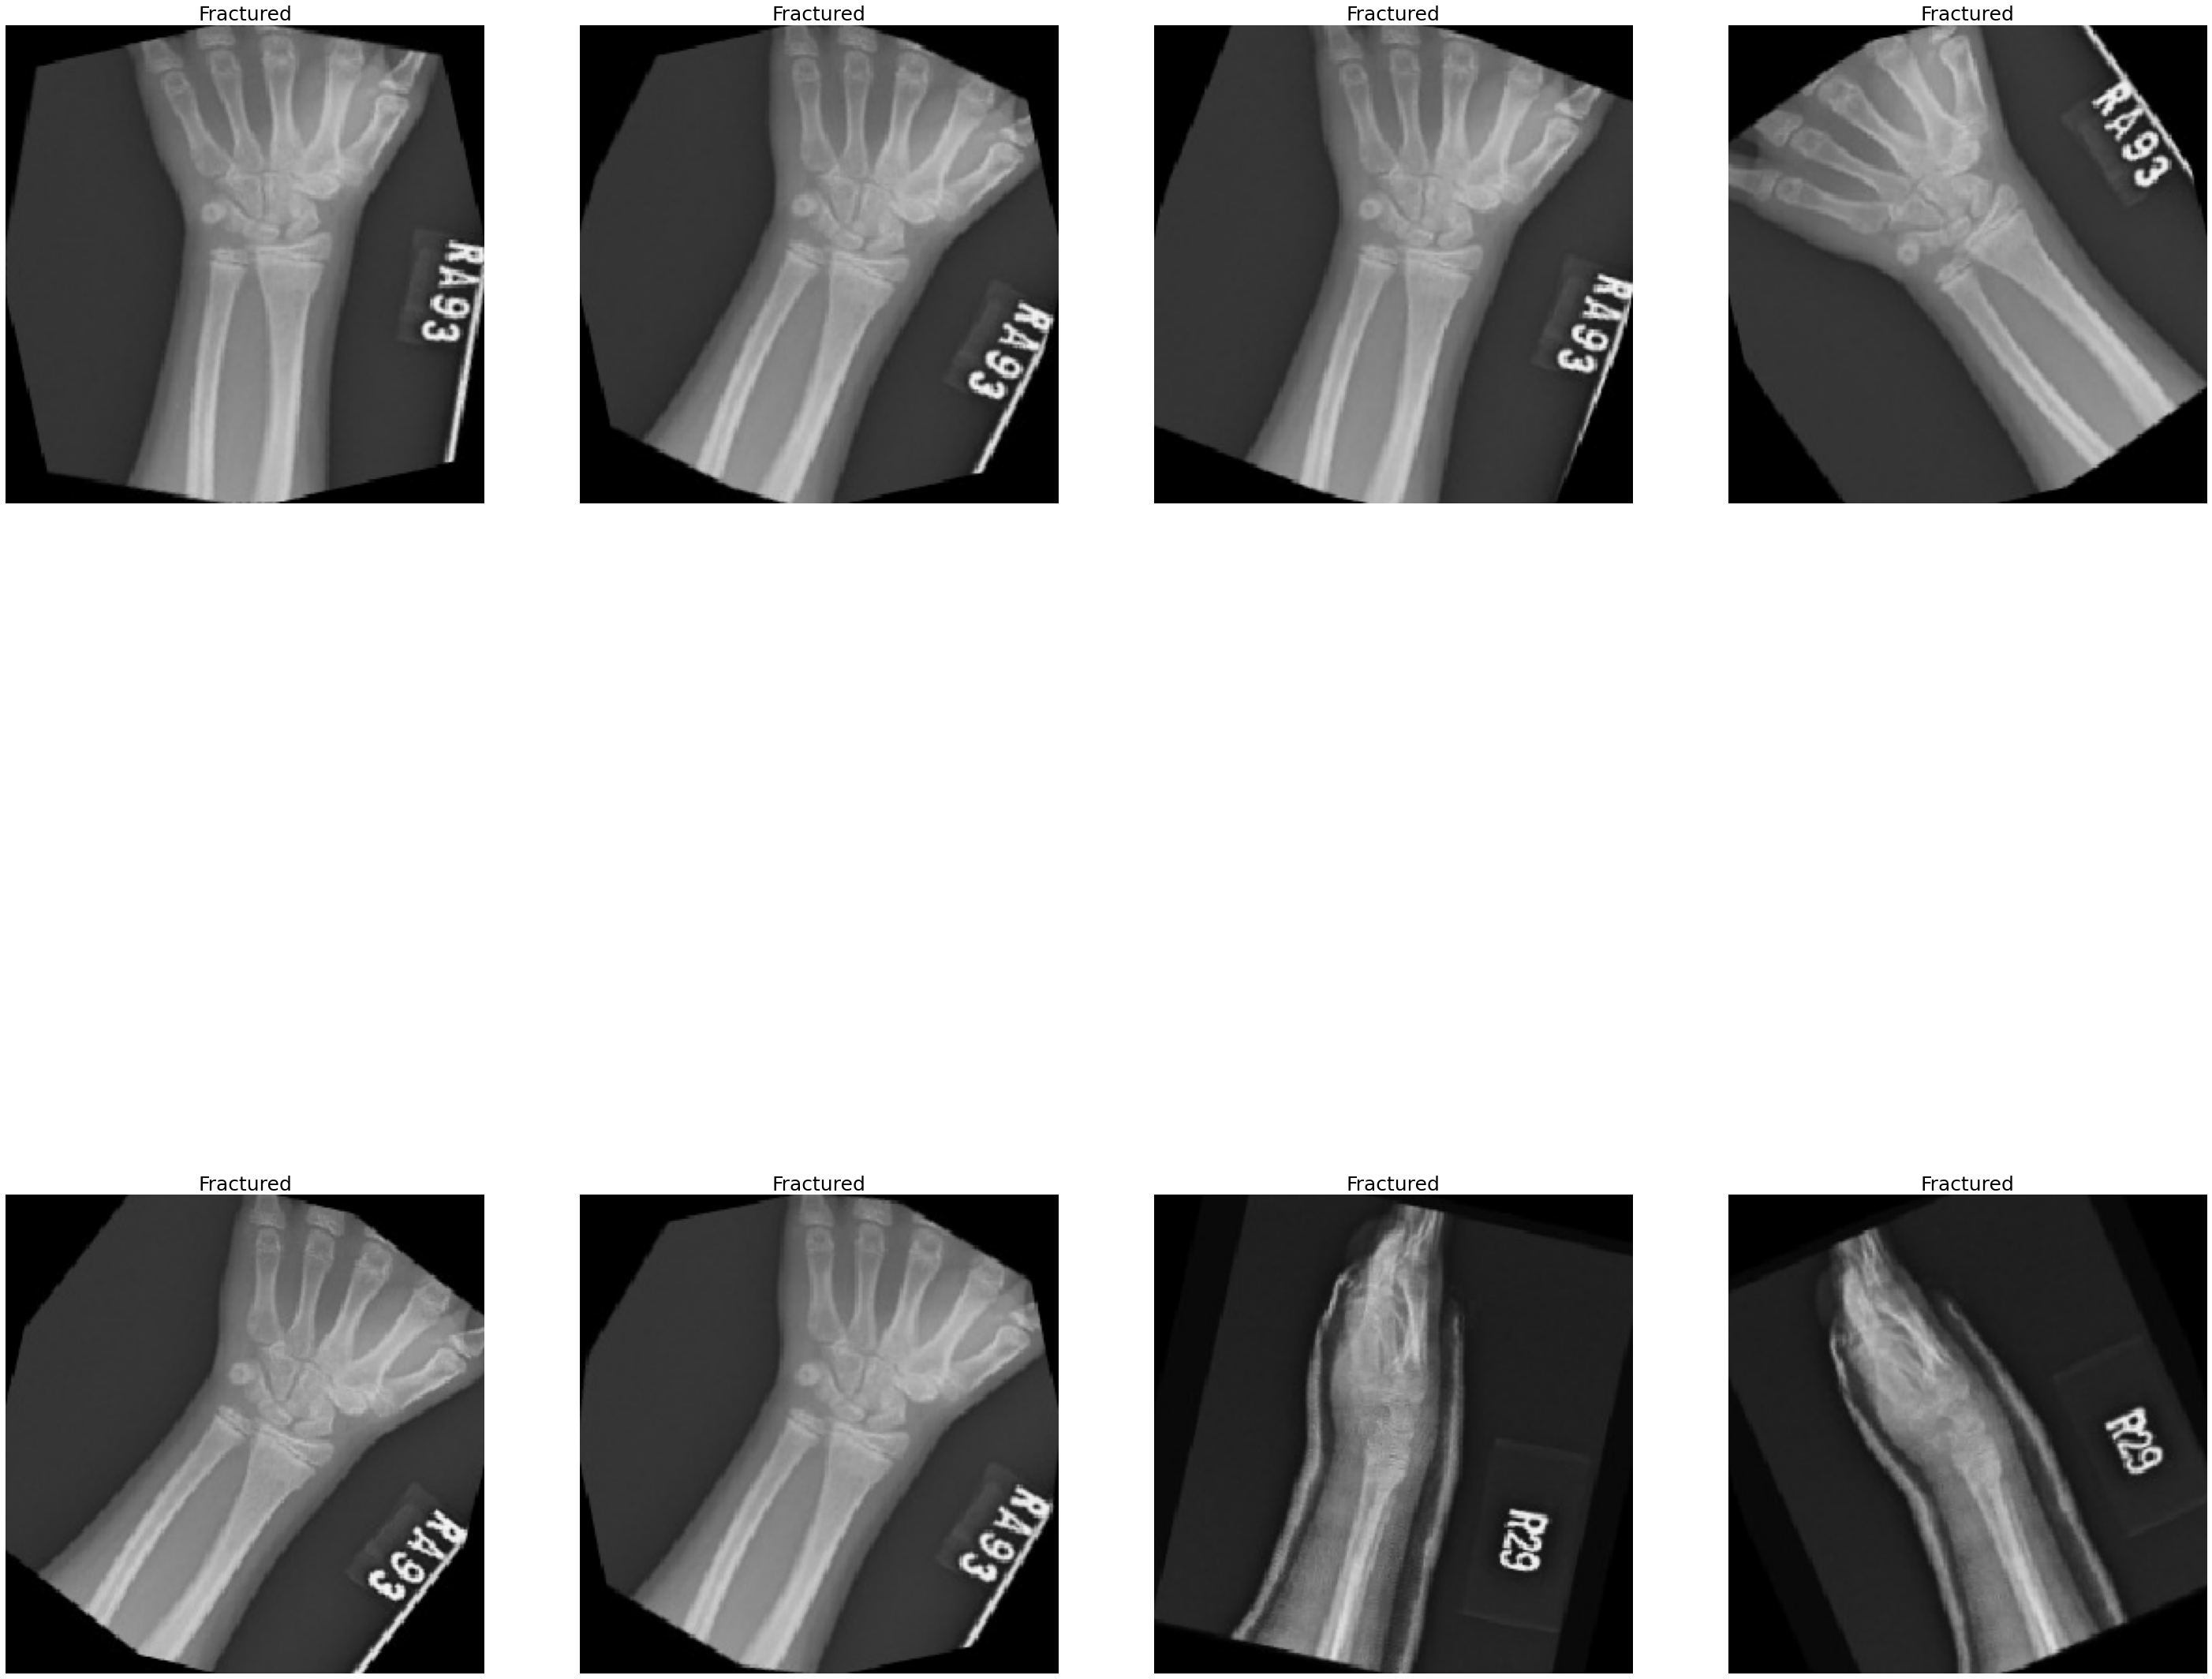

In [26]:
class_names=['Fractured', 'Not Fractured']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(8):
    plt.subplot(2,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)
    

array([[198,   1],
       [  8, 192]], dtype=int64)

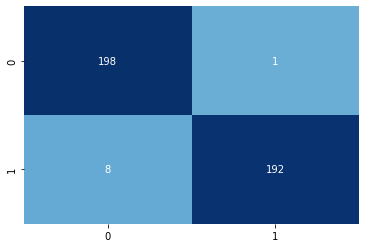

In [27]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [28]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.96      0.99      0.98       199
           1       0.99      0.96      0.98       200

    accuracy                           0.98       399
   macro avg       0.98      0.98      0.98       399
weighted avg       0.98      0.98      0.98       399



## CNN

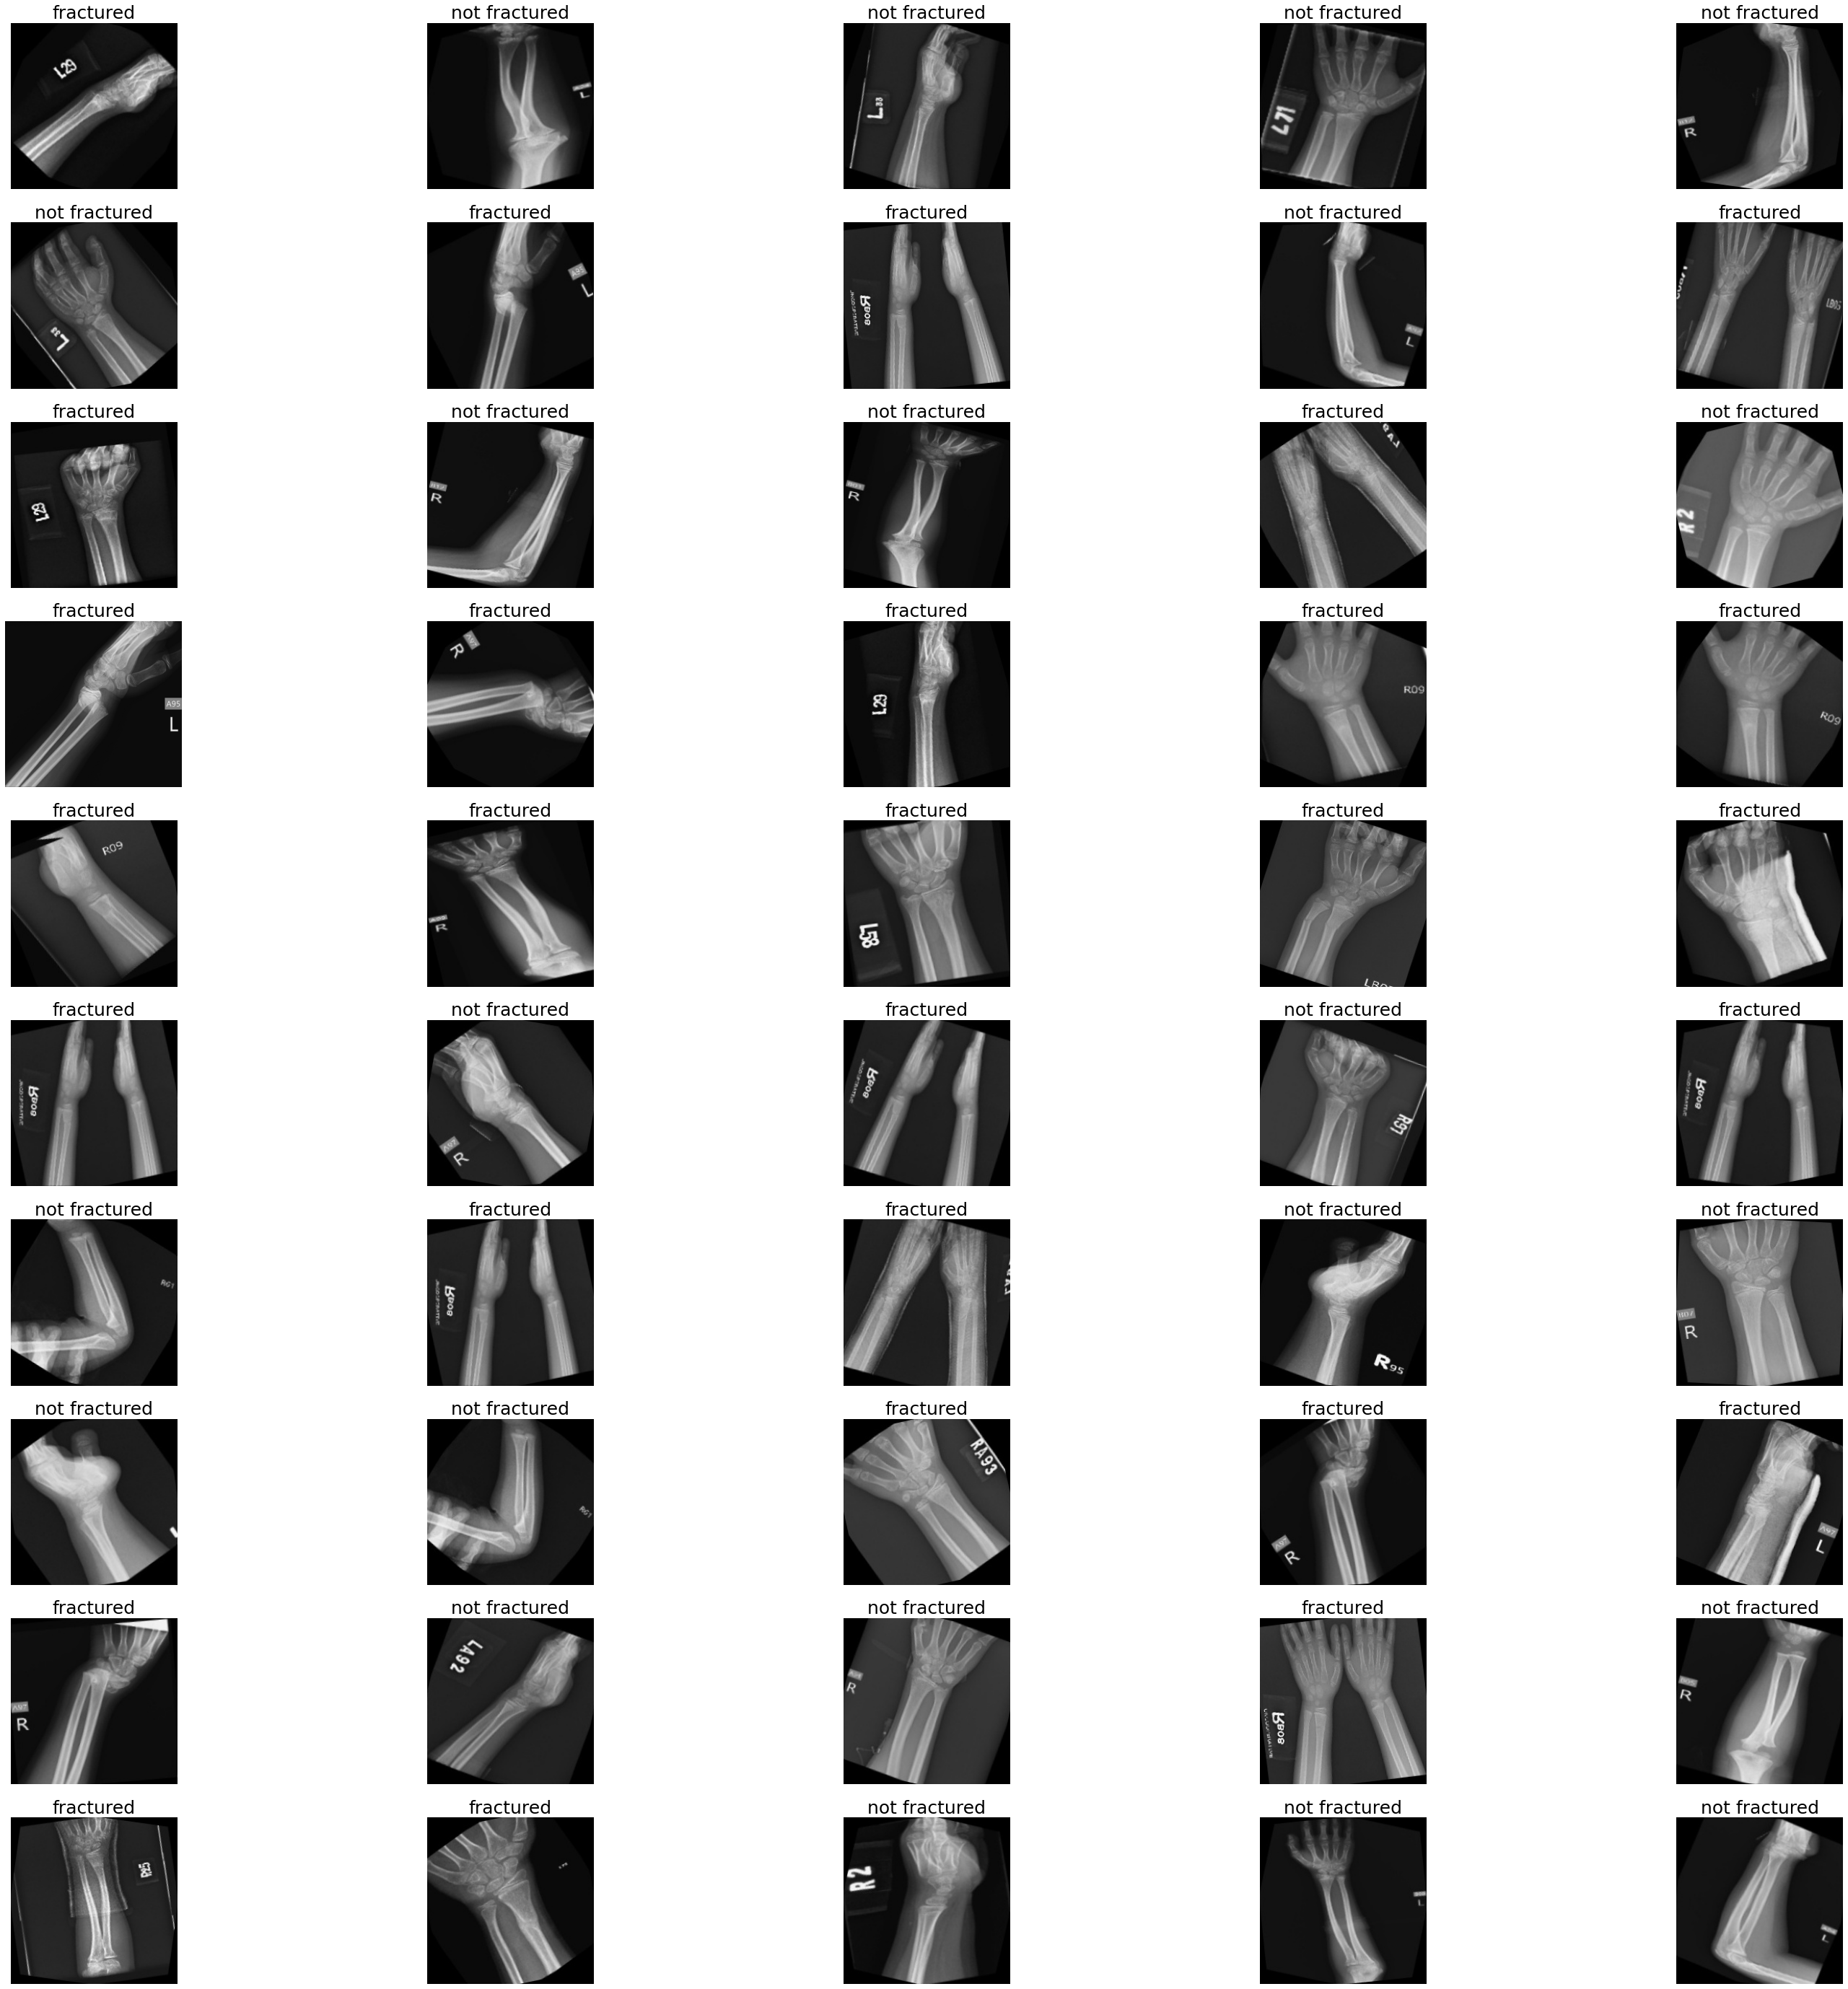

In [33]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train.label[i],fontsize=25)

In [32]:
#Data Augmentation
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 4097 validated image filenames belonging to 2 classes.
Found 399 validated image filenames belonging to 2 classes.
Found 404 validated image filenames belonging to 2 classes.


In [29]:
#cnn
#Modeling
class_num=1
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(224,224,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))  
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(class_num,activation=tf.nn.sigmoid))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_35 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_36 (Bat  (None, 109, 109, 64)     256       
 chNormalization)                                                
                                                        

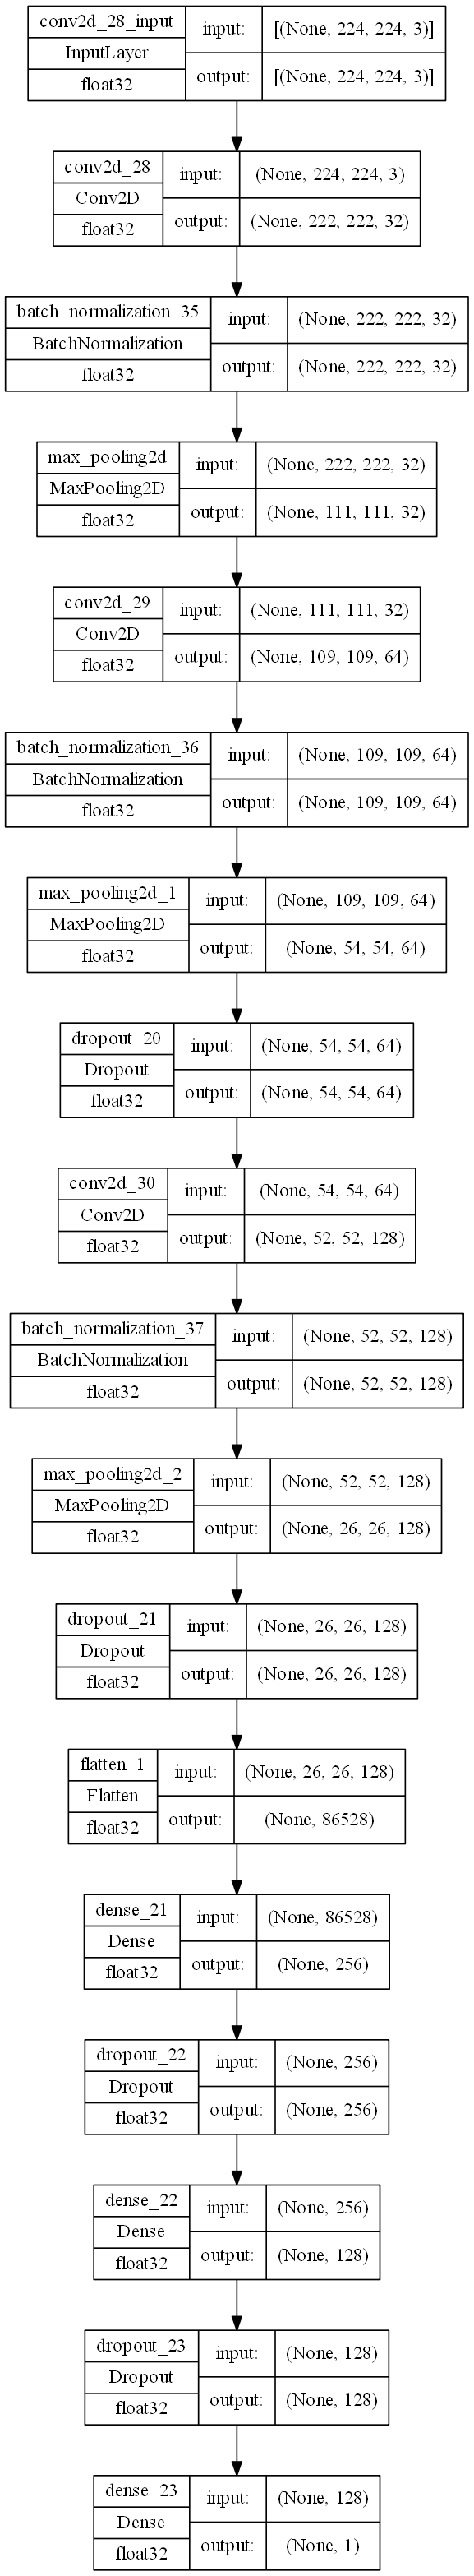

In [30]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [34]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist=model.fit_generator(train_generator,epochs=10,validation_data=val_generator,callbacks=[checkpoint_cb,early_stopping_cb])

C:\Users\Danishga\AppData\Local\Temp/ipykernel_11276/4118689137.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator,epochs=10,validation_data=val_generator,callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/10
129/129 [==============================] - 388s 3s/step - loss: 3.1689 - accuracy: 0.7452 - specificity_at_sensitivity_2: 0.8301 - auc_2: 0.7808 - val_loss: 5.3201 - val_accuracy: 0.5842 - val_specificity_at_sensitivity_2: 0.0060 - val_auc_2: 0.5030
Epoch 2/10
129/129 [==============================] - 384s 3s/step - loss: 1.0638 - accuracy: 0.8496 - specificity_at_sensitivity_2: 0.9293 - auc_2: 0.9026 - val_loss: 0.8789 - val_accuracy: 0.6658 - val_specificity_at_sensitivity_2: 0.8393 - val_auc_2: 0.7681
Epoch 3/10
129/129 [==============================] - 379s 3s/step - loss: 0.5929 - accuracy: 0.9002 - specificity_at_sensitivity_2: 0.9654 - auc_2: 0.9487 - val_loss: 1.6458 - val_accuracy: 0.6634 - val_specificity_at_sensitivity_2: 0.8095 - val_auc_2: 0.7353
Epoch 4/10
129/129 [==============================] - 386s 3s/step - loss: 0.2371 - accuracy: 0.9461 - specificity_at_sensitivity_2: 0.9836 - auc_2: 0.9779 - val_loss: 1.2114 - val_accuracy: 0.8144 - val_specificity_a

In [35]:
#Evaluate The Model
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  specificity_at_sensitivity_2     auc_2  val_loss  \
0  3.168909  0.745179                      0.830125  0.780833  5.320085   
1  1.063780  0.849646                      0.929259  0.902586  0.878875   
2  0.592925  0.900171                      0.965351  0.948670  1.645769   
3  0.237092  0.946058                      0.983638  0.977860  1.211395   
4  0.141410  0.957530                      0.995188  0.990215  0.036984   
5  0.167198  0.966073                      0.989894  0.986499  0.041661   
6  0.182055  0.958750                      0.987969  0.985804  0.008433   
7  0.119616  0.971443                      0.993263  0.990504  0.042085   
8  0.079971  0.979741                      0.997113  0.995283  0.002032   
9  0.090883  0.977545                      0.994225  0.994227  0.031076   

   val_accuracy  val_specificity_at_sensitivity_2  val_auc_2  
0      0.584158                          0.005952   0.502976  
1      0.665842                          0.839286   0.768059  
2      0.663366                          0.809524   0.735333  
3      0.814356                          0.809524   0.868127  
4      0.987624                          1.000000   0.999659  
5      0.987624                          0.994048   0.996835  
6      0.995049                          1.000000   1.000000  
7      0.985148                          1.000000   0.999243  
8      1.000000                          1.000000   1.000000  
9      0.992574                          1.000000   0.999735

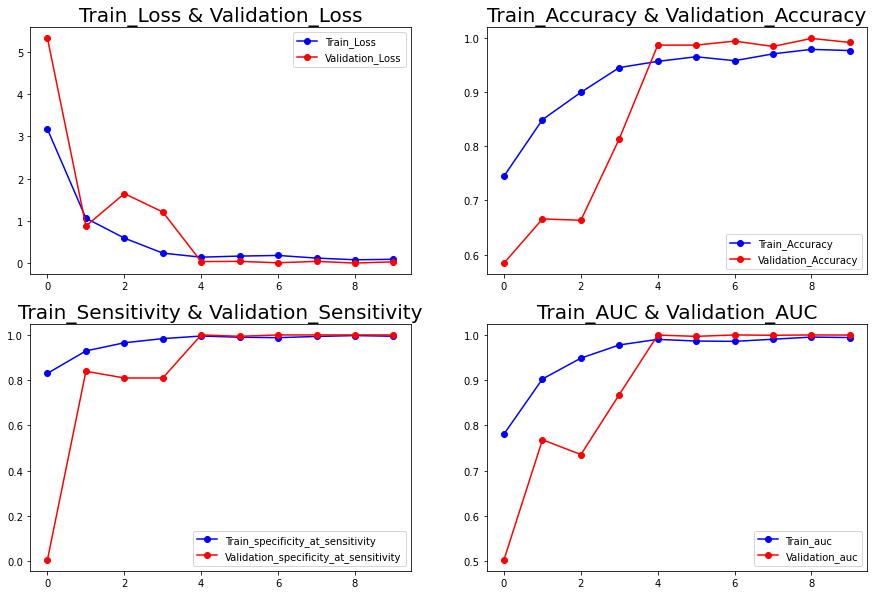

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity_2'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity_2'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc_2'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc_2'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [38]:
score, acc,sensitivity,auc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test Sensitivity =', sensitivity)
print('Test AUC =', auc)

13/13 [==============================] - 9s 679ms/step - loss: 0.1734 - accuracy: 0.9649 - specificity_at_sensitivity_2: 0.9950 - auc_2: 0.9879
Test Loss = 0.17338405549526215
Test Accuracy = 0.9649122953414917
Test Sensitivity = 0.9949748516082764
Test AUC = 0.9879396557807922


In [39]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

13/13 [==============================] - 10s 669ms/step


Actual  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
..      ...         ...
394       1           1
395       1           1
396       1           1
397       1           1
398       1           1

[399 rows x 2 columns]

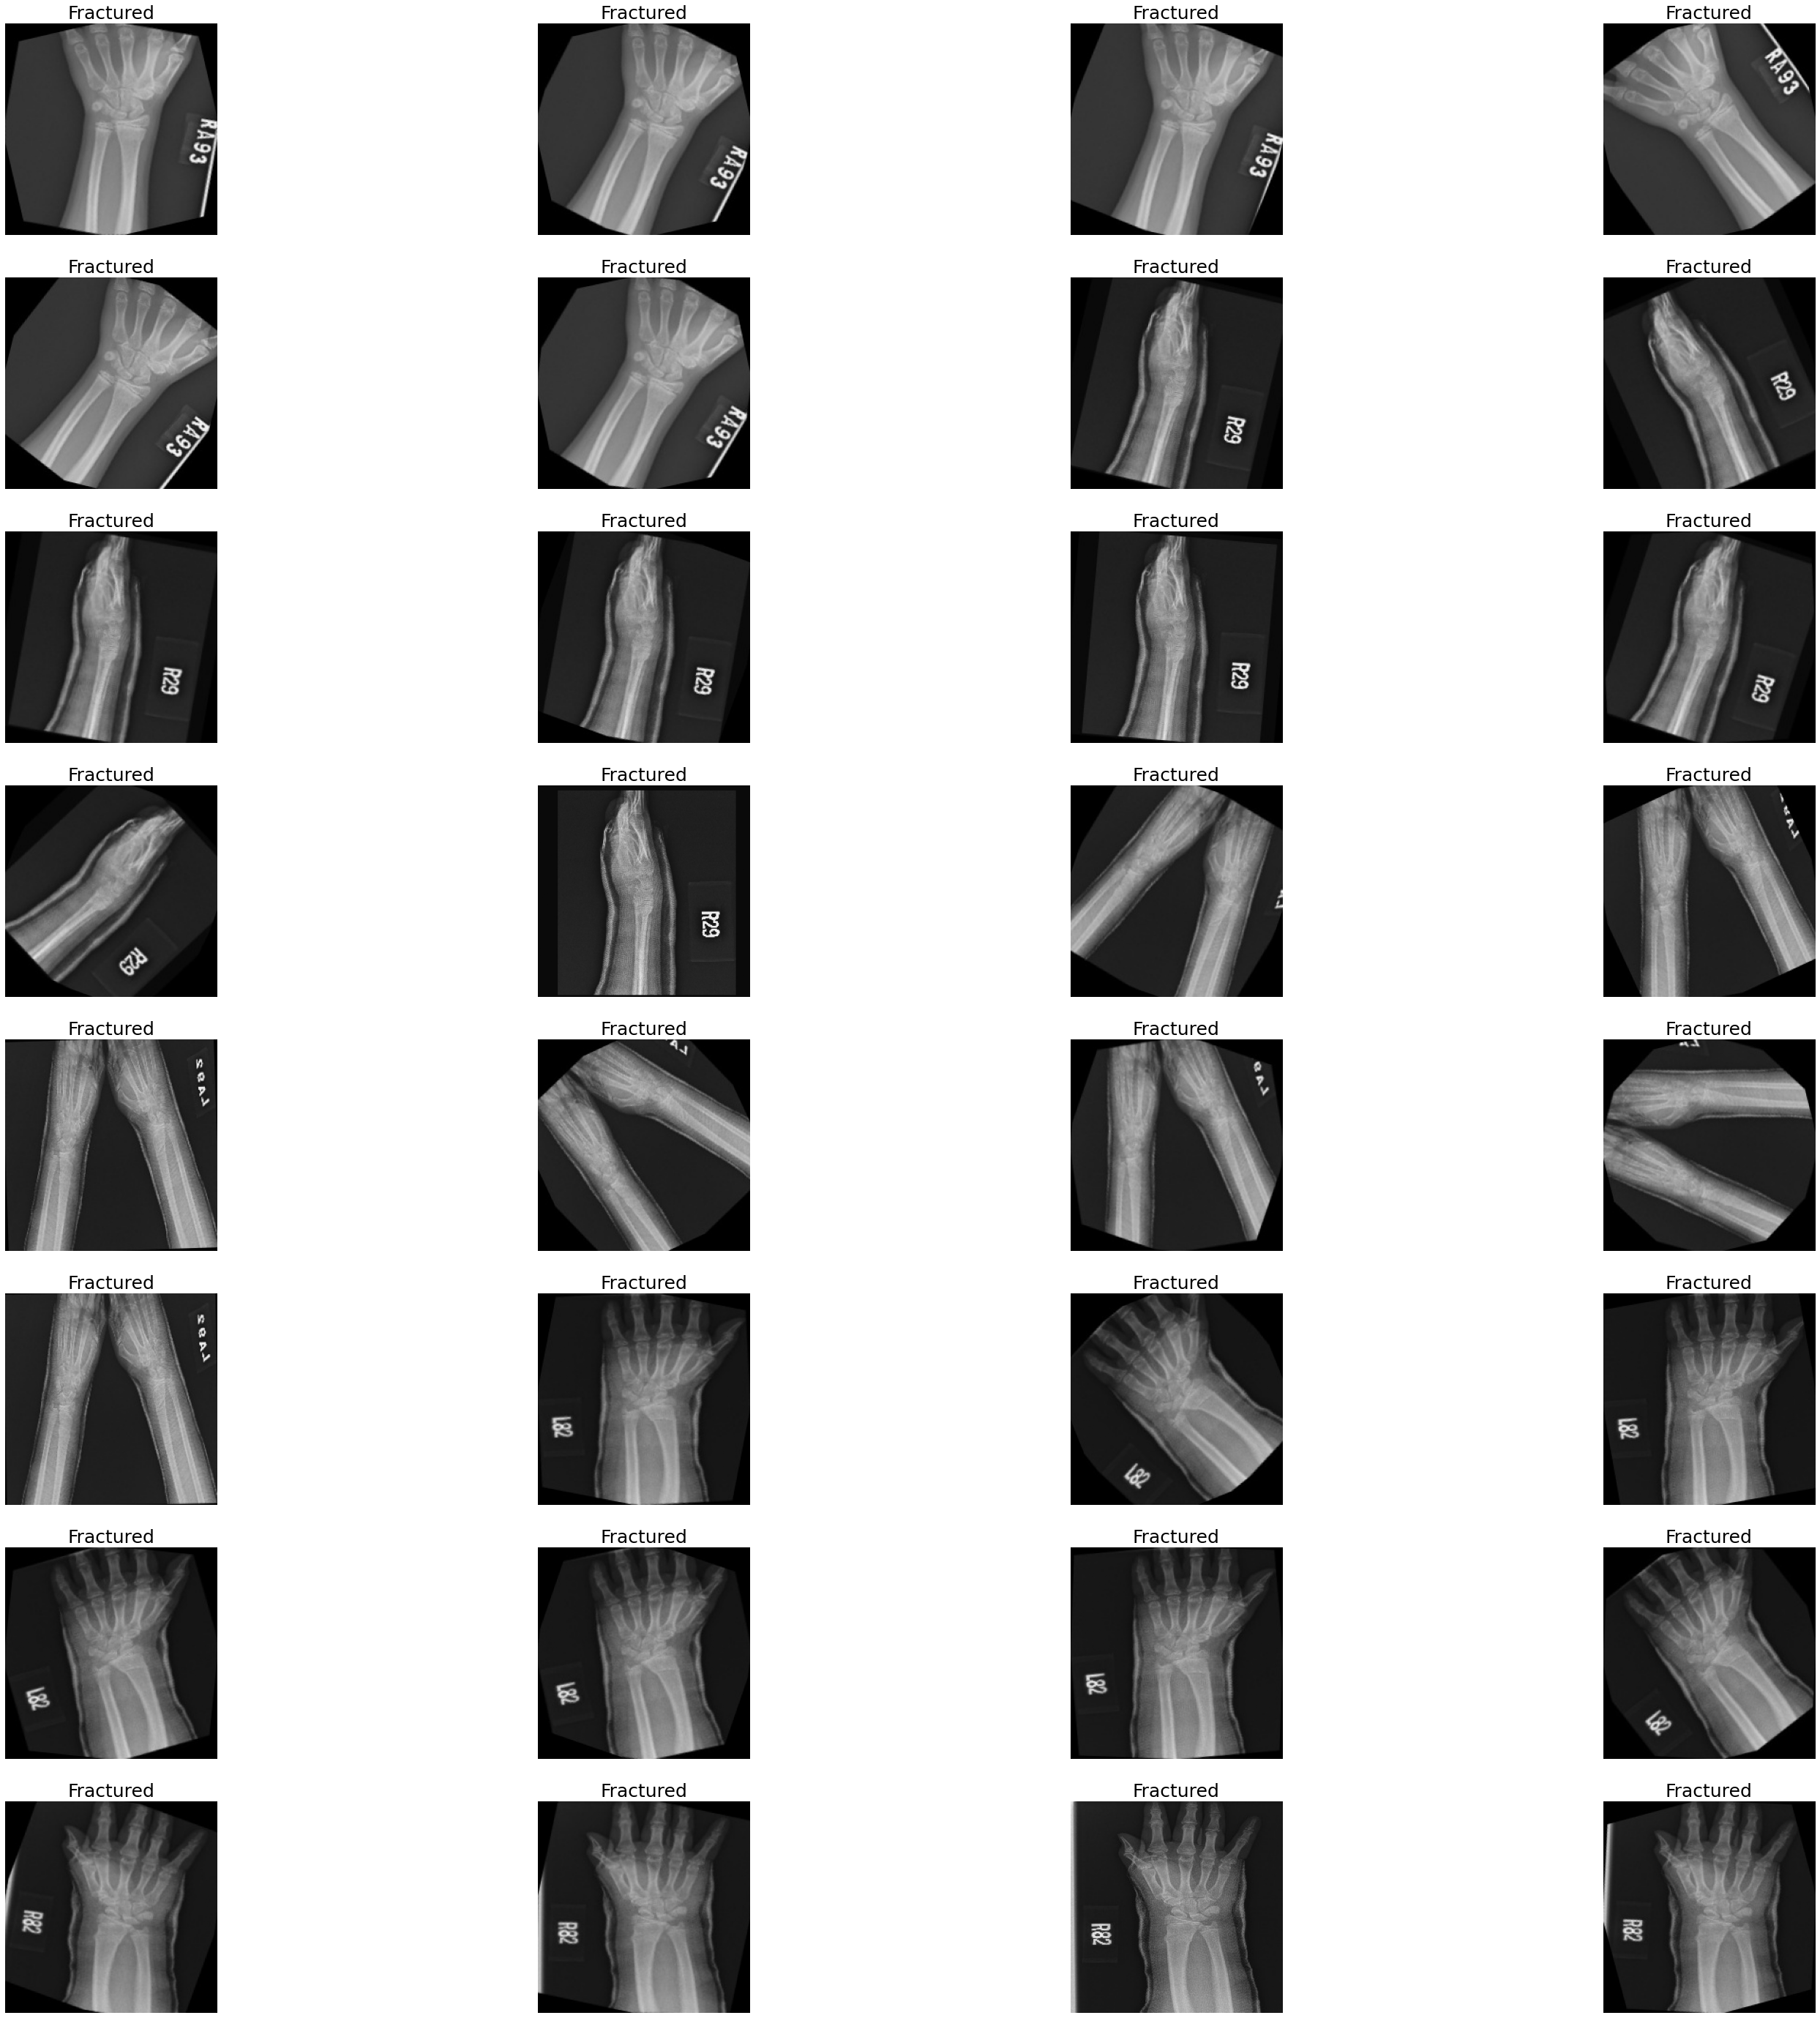

In [40]:
class_names=['Fractured', 'Not Fractured']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

array([[196,   3],
       [ 11, 189]], dtype=int64)

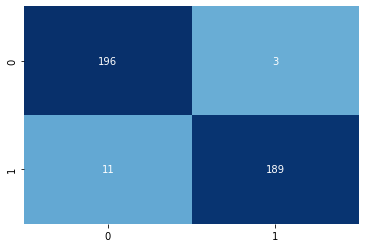

In [41]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [42]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.98      0.97       199
           1       0.98      0.94      0.96       200

    accuracy                           0.96       399
   macro avg       0.97      0.96      0.96       399
weighted avg       0.97      0.96      0.96       399

